# VisTool Package Example and Usage

This Jupyter Notebook demonstrates how to use the `VisTool` for downloading data, combining datasets, cleaning and wrangling data and visualizing results. Each module in the VisTool provides specific functionalities to streamline data analysis workflows.

## Prerequisites
Before using this notebook, ensure the following:
1. The `vistool` is correctly installed in your Python environment.

## Download Module

The `download` module helps retrieve files from the web and load CSV data into Pandas DataFrames for analysis.

### Features
1. `download_file`: Retrieve a file from a URL and save it to a specified local path.
2. `download_csv`: Downloads a CSV file directly from a URL into a Pandas DataFrame.
3. `load_csv`: Loads a CSV file into a Pandas DataFrame from local path.
4. `load_excel`: Load excel file into a Pandas DataFrame from local path.
5. `summerize_data`: Summarises key aspects of the dataset and provides an overview of its structure.

---

## Combine Module

The `combine` module provides functionality to merge or concatenate datasets.

### Features
1. `merge_datasets`: Combine two datasets based on a common column with options for join types (`inner`, `outer`, etc.).
2. `concat_datasets`: Append multiple datasets along rows or columns.

---

## Wrangle Module

The `wrangle` module supports data cleaning, filtering, and column renaming to prepare datasets for analysis.

### Features
1. `clean_data`: Handle missing values by filling them with means, removing rows/columns, or keeping them unchanged.
2. `filter_data`: Filter rows based on user-defined conditions.
3. `rename_columns`: Rename dataset columns for clarity or standardisation.
4. `label_encode` : Perform label encoding on a categorical column using Pandas and NumPy.

---

## Visualize Module

The `visualize` module facilitates data visualization using Matplotlib and Seaborn.

### Features
1. `plot_histogram`: Plots a histogram of a column.
2. `plt_scatter`: Creates a scatter plot of two columns.
3. `plot_correlation_matrix`: Plots a heatmap of correlations between numeric columns.
4. `plot_line`: Plots a line chart for time-series data.
5. `plot_overlay`: Overlays multiple columns with different plot types.

---

## Structure
Each module is demonstrated with relevant examples, including step-by-step code and explanations, making it easy to adapt for your own analysis. 

**Checking the package information:**

In [1]:
# Check details on the package
import vistool
print(vistool.__version__)
print(vistool.__name__)
print(vistool.__author__)

1.0.0
vistool
Guled Abdullahi and Kayleigh Haydock brrrrrrr 


**Imports to be ran before modules:**

In [2]:
# Imports to run before running individual codeblocks below
import os
import pandas as pd
import matplotlib.pyplot as plt

**Download Module**

Example 1: Downloading File

In [3]:
# Import the download functions
from vistool.download import (
    download_file,
    download_csv, 
    load_csv,
    load_excel, 
    summarize_data
)
import os

# Download a file and save it locally
url = "https://people.sc.fsu.edu/~jburkardt/data/csv/airtravel.csv"
save_path = "data/airtravel.csv"

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Download the file
download_file(url, save_path)

# Verify the file is saved
if os.path.exists(save_path):
    print(f"File downloaded successfully and saved to: {save_path}")
else:
    print("Failed to download the file.")


File downloaded successfully: data/airtravel.csv
File downloaded successfully and saved to: data/airtravel.csv


Example 2: Downloading CSV

In [ ]:
#  Download a CSV file and load into Pandas DataFrame
url = "https://people.sc.fsu.edu/~jburkardt/data/csv/airtravel.csv"
df = download_csv(url)

# Display the first few rows of the DataFrame
print("Downloaded CSV Data:")
print(df.head())

Example 3: Load a CSV

In [4]:
#Load csv file 
df = load_csv('data/Monthly_AE_Attendances_Nov_2024.csv')
df.head(5)

File 'data/Monthly_AE_Attendances_Nov_2024.csv' loaded successfully!


,period,org_code,parent_org,org_name,ae_attendances_type_1,ae_attendances_type_2,ae_attendances_other_ae_department,ae_attendances_booked_appointments_type_1,ae_attendances_booked_appointments_type_2,ae_attendances_booked_appointments_other_department,...,attendances_over_4hrs_other_department,attendances_over_4hrs_booked_appointments_type_1,attendances_over_4hrs_booked_appointments_type_2,attendances_over_4hrs_booked_appointments_other_department,patients_who_have_waited_4-12_hs_from_dta_to_admission,patients_who_have_waited_12+_hrs_from_dta_to_admission,emergency_admissions_via_ae-type_1,emergency_admissions_via_ae-type_2,emergency_admissions_via_ae-other_AE_department,other_emergency_admissions
0,MSitAE-NOVEMBER-2024,NL7,NHS ENGLAND MIDLANDS,ASSURA VERTIS URGENT CARE CENTRES (BIRMINGHAM),0,0,4350,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,MSitAE-NOVEMBER-2024,RWY,NHS ENGLAND NORTH EAST AND YORKSHIRE,CALDERDALE AND HUDDERSFIELD NHS FOUNDATION TRUST,15295,0,0,0,0,0,...,0,0,0,0,1160,16,3104,0,0,316
2,MSitAE-NOVEMBER-2024,AAH,NHS ENGLAND SOUTH WEST,TETBURY HOSPITAL TRUST LTD,0,0,516,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,MSitAE-NOVEMBER-2024,AQN04,NHS ENGLAND SOUTH EAST,PHL LYMINGTON UTC,0,0,2593,0,0,12,...,1,0,0,0,0,0,0,0,0,0
4,MSitAE-NOVEMBER-2024,C82038,NHS ENGLAND MIDLANDS,LATHAM HOUSE MEDICAL PRACTICE,0,0,303,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Example 4: Load an Excel File

In [5]:
# Load_excel file 
df_dict = load_excel('data/titanic3.xls')
print(type(df_dict))  # Output: <class 'dict'>
print(df_dict.keys())  # Output: dict_keys(['Sheet1', 'Sheet2', ...])

File 'data/titanic3.xls' loaded successfully!
<class 'dict'>
dict_keys(['titanic3'])


In [6]:
df = df_dict['titanic3']  # Access the DataFrame for the 'titanic3' sheet
print(df.head(5))  # Display the first 5 rows of the DataFrame

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

Example 5: Summerize Data

In [7]:
# Summary of the data 
df = load_csv('data/monthly_ae_attendances_nov_2024.csv')
summarize_data(df)

File 'data/monthly_ae_attendances_nov_2024.csv' loaded successfully!

    --- Data Overview ---
    Shape: 198 rows, 22 columns

    Numeric Columns: 18 columns (e.g., ae_attendances_type_1, ae_attendances_type_2, ae_attendances_other_ae_department...)
    Non-Numeric Columns: 4 columns (e.g., period, org_code, parent_org...)

    Missing Values: 0 missing values in total
    Duplicate Rows: 0 duplicate rows

    Categorical Columns: 2 columns (e.g., period, parent_org...)

    Correlation between numeric columns:
                                                        ae_attendances_type_1  \
ae_attendances_type_1                                            1.000000   
ae_attendances_type_2                                            0.980878   
ae_attendances_other_ae_department                               0.996996   
ae_attendances_booked_appointments_type_1                        0.985124   
ae_attendances_booked_appointments_type_2                        0.793002   
ae_attendances

**Combine Module**

Example 1: Inner Join

In [8]:
# Import combine module functions
from vistool.combine import merge_datasets, concat_datasets

#Example 1: Inner Join
# Sample data
data1 = {'id': [1, 2, 3], 'name': ['Alice', 'Bob', 'Charlie']}
data2 = {'id': [2, 3, 4], 'age': [25, 30, 35]}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Merge Datasets Inner Join
merged_data = merge_datasets(df1, df2, on="id", how="inner")
print(merged_data)

Datasets merged successfully using inner join.
   id     name  age
0   2      Bob   25
1   3  Charlie   30


Example 2: Outer Join

In [9]:
# Example 2: Merge datasets Outer Join
merged_data = merge_datasets(df1, df2, on="id", how="outer")
print(merged_data)

Datasets merged successfully using outer join.
   id     name   age
0   1    Alice   NaN
1   2      Bob  25.0
2   3  Charlie  30.0
3   4      NaN  35.0


Example 3: Concatenate Rows

In [10]:
# Example 3: Concatenating Row-Wise

# Sample data
df1 = pd.DataFrame({'id': [1, 2], 'name': ['Alice', 'Bob']})
df2 = pd.DataFrame({'id': [3, 4], 'name': ['Charlie', 'David']})

# Concatenate row-wise
concatenated_data = concat_datasets([df1, df2], axis=0)
print(concatenated_data)

Datasets concatenated successfully along axis 0.
   id     name
0   1    Alice
1   2      Bob
0   3  Charlie
1   4    David


Example 4: Concatenate Columns

In [11]:
# Concatenate column-wise
concatenated_data = concat_datasets([df1, df2], axis=1)
print(concatenated_data)

Datasets concatenated successfully along axis 1.
   id   name  id     name
0   1  Alice   3  Charlie
1   2    Bob   4    David


**Wrangle Module**

Example 1: Drop Rows with NaNs

In [12]:
# Import wrangle module functions
from vistool.wrangle import (
    clean_data, 
    filter_data, 
    rename_columns, 
    label_encode
)

data1 = pd.DataFrame({
    "A": [1, 2, None, 4],
    "B": [5, None, 7, 8],
    "C": [9, 10, 11, 12]
})

# Clean the Data
# Example 1: Drop rows with NaN values in specific columns in column 'A'
print("Original Data:")
print(data1)

cleaned_data1 = clean_data(data1, remove_columns=["A"])
print("\nCleaned Data (Dropped rows with NaN in column 'A'):")
print(cleaned_data1)

Original Data:
     A    B   C
0  1.0  5.0   9
1  2.0  NaN  10
2  NaN  7.0  11
3  4.0  8.0  12
Rows with NaN in columns ['A'] were dropped.

Cleaned Data (Dropped rows with NaN in column 'A'):
     A    B     C
0  1.0  5.0   9.0
1  2.0  NaN  10.0
2  4.0  8.0  12.0


Example 2: Fill NaN with Column Mean

In [13]:
# Example 2: Fill NaN values with column mean
data2 = pd.DataFrame({
    "X": [1, None, 3, 4],
    "Y": [None, 6, 7, None],
    "Z": [9, 10, None, None]
})

print("\nOriginal Data:")
print(data2)

# Clean data by filling NaN values with column mean
cleaned_data2 = clean_data(data2, fill_with="mean")
print("\nCleaned Data (Filled NaN with column mean):")
print(cleaned_data2)


Original Data:
     X    Y     Z
0  1.0  NaN   9.0
1  NaN  6.0  10.0
2  3.0  7.0   NaN
3  4.0  NaN   NaN
NaN values filled with column mean.

Cleaned Data (Filled NaN with column mean):
     X    Y     Z
0  1.0  6.5   9.0
1  2.7  6.0  10.0
2  3.0  7.0   9.5
3  4.0  6.5   9.5


Example 3: Fill NaN with Row Mean

In [14]:
# Example 3: Fill NaN values with the row mean
data3 = pd.DataFrame({
    "P": [1, None, 3],
    "Q": [4, 5, None],
    "R": [None, 7, 8]
})

print("\nOriginal Data:")
print(data3)

# Clean data by filling NaN values with row mean
cleaned_data3 = clean_data(data3, fill_with="mean", apply_to="rows")
print("\nCleaned Data (Filled NaN with row mean):")
print(cleaned_data3)


Original Data:
     P    Q    R
0  1.0  4.0  NaN
1  NaN  5.0  7.0
2  3.0  NaN  8.0
NaN values filled with row mean.

Cleaned Data (Filled NaN with row mean):
     P    Q    R
0  1.0  4.0  2.5
1  6.0  5.0  7.0
2  3.0  5.5  8.0


Example 4: Drop Rows with NaNs

In [15]:
# Example 4: Drop rows with any NaN values (default)
data4 = pd.DataFrame({
    "U": [1, 2, None, 4],
    "V": [None, 5, 6, 7]
})

print("\nOriginal Data:")
print(data4)

# Clean data by dropping rows with any NaN values
cleaned_data4 = clean_data(data4)
print("\nCleaned Data (Dropped rows with any NaN values):")
print(cleaned_data4)


Original Data:
     U    V
0  1.0  NaN
1  2.0  5.0
2  NaN  6.0
3  4.0  7.0
Rows with any NaN values were dropped.

Cleaned Data (Dropped rows with any NaN values):
     U    V
0  2.0  5.0
1  4.0  7.0


Example 5: Filtering Data

In [16]:
# Example 5: Filtering Data
# Only include customers aged over 30 who have made more than 5 purchases

# A customer dataset
data = pd.DataFrame({
    'Customer_ID': [101, 102, 103, 104, None, 106, 107, 108],
    'Age': [25, 30, 35, None, 40, None, 45, 50],
    'Gender': [
        'Male', 'Female', 'Female', 'Male', 
        'Female', 'Male', 'Female', 'Male'
    ],
    'Annual_Income': [
        50000, None, 70000, 80000, 
        60000, 90000, None, 100000
    ],
    'Purchase_History': 
        [3, 5, None, 7, 
         8, 9, 6, 2
    ],
    'City': ['NY', 'LA', 'SF', 'LA', 'NY', 'SF', 'LA', 'NY'],
    'Customer_Type': [
        'Regular', 'VIP', 'Regular', 'VIP', 
        'Regular', 'Regular', 'VIP', 'Regular'
    ]
})

filtered_data = filter_data(data, "Age > 30 and Purchase_History > 5")

filtered_data

Data filtered successfully.


,Customer_ID,Age,Gender,Annual_Income,Purchase_History,City,Customer_Type
4,NaN,40.0,Female,60000.0,8.0,NY,Regular
6,107.0,45.0,Female,NaN,6.0,LA,VIP


Example 6: Renaming Columns

In [17]:
# Example 6: Renaming Columns
# Rename 'Customer_Type' -> 'Customer_Category' 
# &'Purchase_History' -> 'Purchases_Made'

renamed_data = rename_columns(
    data, 
    {
    'Customer_Type': 'Customer_Category', 
    'Purchase_History': 'Purchases_Made'
    }
)
renamed_data

Columns renamed successfully.


,Customer_ID,Age,Gender,Annual_Income,Purchases_Made,City,Customer_Category
0,101.0,25.0,Male,50000.0,3.0,NY,Regular
1,102.0,30.0,Female,NaN,5.0,LA,VIP
2,103.0,35.0,Female,70000.0,NaN,SF,Regular
3,104.0,NaN,Male,80000.0,7.0,LA,VIP
4,NaN,40.0,Female,60000.0,8.0,NY,Regular
5,106.0,NaN,Male,90000.0,9.0,SF,Regular
6,107.0,45.0,Female,NaN,6.0,LA,VIP
7,108.0,50.0,Male,100000.0,2.0,NY,Regular


Example 7: Label Encoding

In [18]:
# Example 7: Label Encoding
# 'Gender' and 'Customer_Type' columns
# Convert 'Gender' (Male/Female) to 0/1 & 'Customer_Type' (Regular/VIP) to 0/1

encoded_data = label_encode(data, 'Gender')
encoded_data = label_encode(data, 'Customer_Type')

# Display the final wrangled dataset
print("Final Data After Wrangling:")
encoded_data

Label encoding applied to column: Gender
Label encoding applied to column: Customer_Type
Final Data After Wrangling:


,Customer_ID,Age,Gender,Annual_Income,Purchase_History,City,Customer_Type
0,101.0,25.0,1,50000.0,3.0,NY,0
1,102.0,30.0,0,NaN,5.0,LA,1
2,103.0,35.0,0,70000.0,NaN,SF,0
3,104.0,NaN,1,80000.0,7.0,LA,1
4,NaN,40.0,0,60000.0,8.0,NY,0
5,106.0,NaN,1,90000.0,9.0,SF,0
6,107.0,45.0,0,NaN,6.0,LA,1
7,108.0,50.0,1,100000.0,2.0,NY,0


**Visualize Module**

Example 1: Histogram

Dataset for Histogram:
   Age(Years)  Cholesterol(mmol/L)
0          25                  1.0
1          30                  2.0
2          35                  7.0
3          40                  5.0
4          45                  3.0
5          50                  5.0
6          55                  5.2
7          60                  1.3
8          65                  4.8
9          70                  9.9


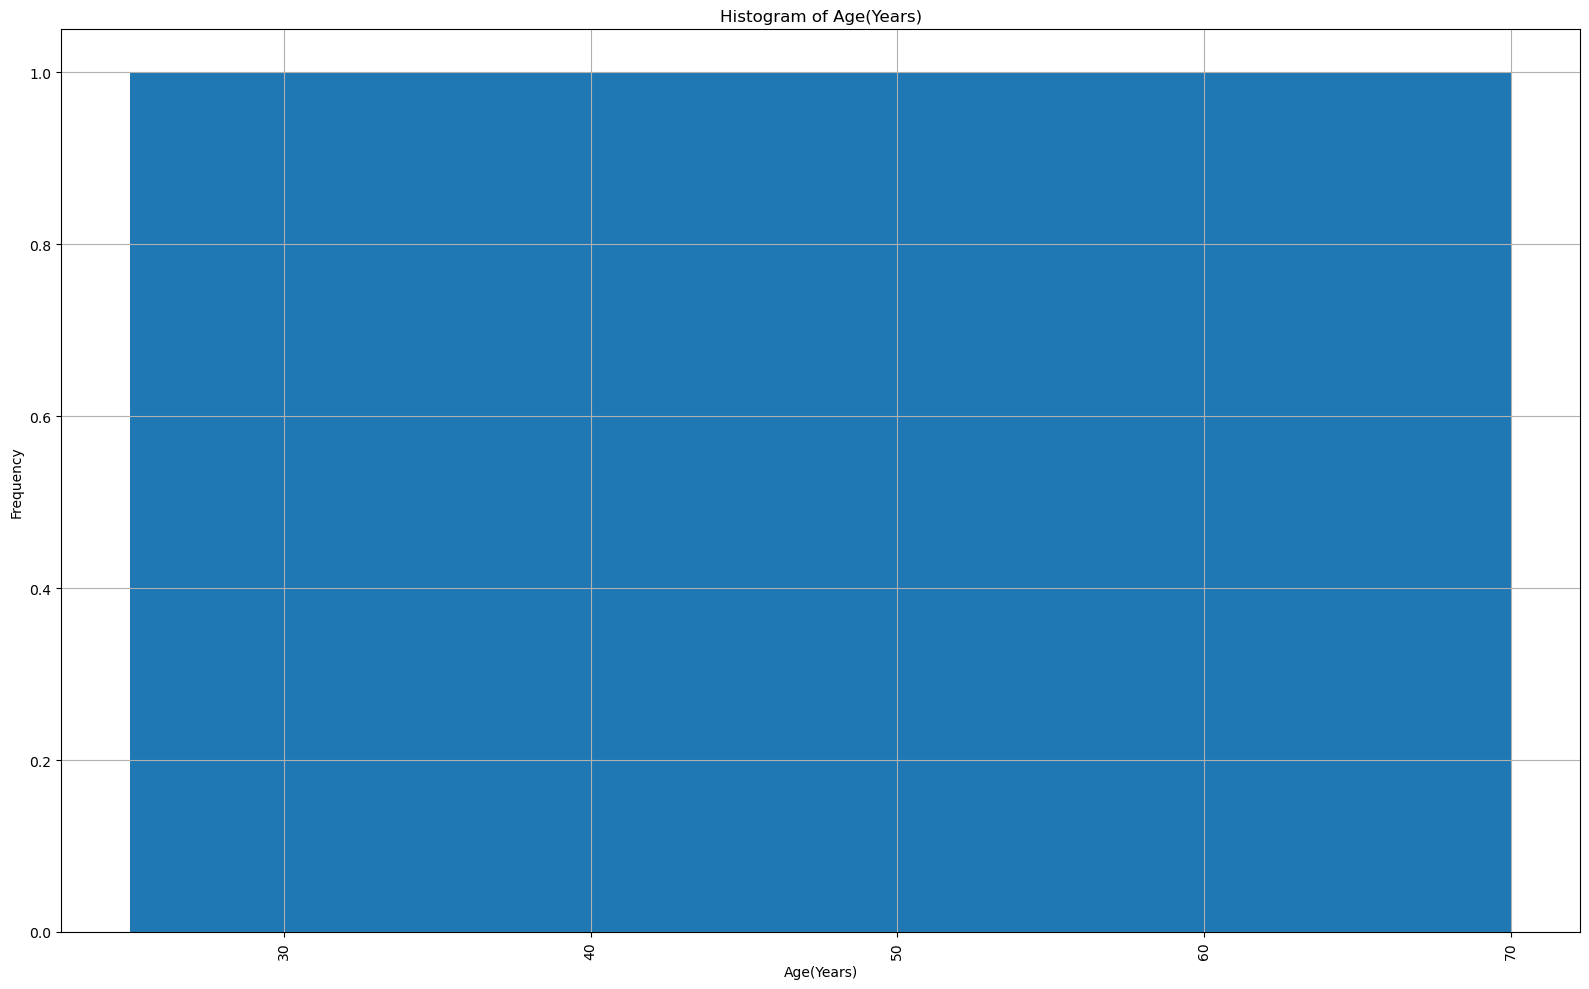

Histogram saved to age_histogram.png


In [19]:
# Importing visualization functions from visualize.py
from vistool.visualize import (
    plot_histogram, 
    plot_scatter, 
    plot_correlation_matrix, 
    plot_line, 
    plot_overlay
)

# Example dataset
data1 = pd.DataFrame({
    "Age(Years)": [25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    "Cholesterol(mmol/L)": [1, 2, 7, 5, 3, 5, 5.2, 1.3, 4.8, 9.9]
})

# Example 1: Plot a histogram for the "Age" column
print("Dataset for Histogram:")
print(data1)

plot_histogram(data1, column="Age(Years)")

# Save the histogram to a file
plot_histogram(data1, column="Age(Years)", save_path="age_histogram.png")

Example 2: Scatter Plot

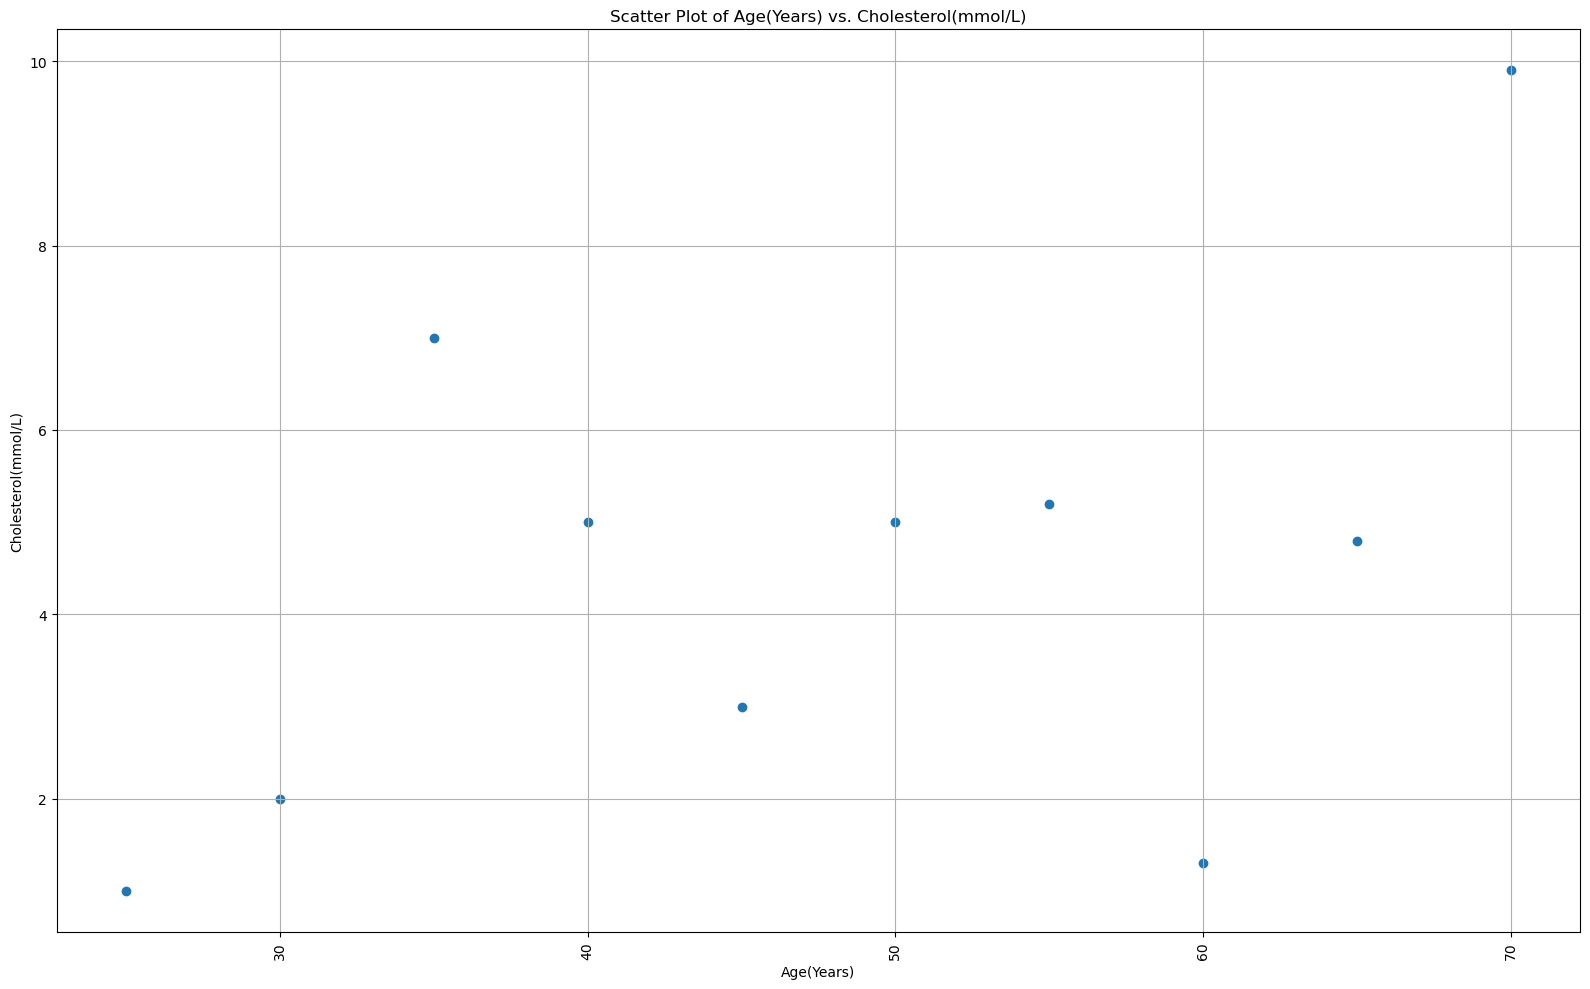

Scatter plot saved to age_vs_cholesterol.png


In [20]:
# Example 2: Plot a scatter plot between "Age(Years)" and "Cholesterol(mmol/L)"
plot_scatter(
    data1, 
    x_column="Age(Years)", 
    y_column="Cholesterol(mmol/L)"
)

# Save the scatter plot to a file
plot_scatter(
    data1, 
    x_column="Age(Years)", 
    y_column="Cholesterol(mmol/L)", save_path="age_vs_cholesterol.png"
)

Example 3: Correlation Matrix

In [21]:
# Example 3: Dataset for correlation matrix
data2 = pd.DataFrame({
    "Weight (KG)": [50, 90, 88, 47, 61],
    "Height (CM)": [161, 185, 175, 150, 154],
    "Male": ["string", 2, 1, "vvv", "sss"]
})

print("Dataset for Correlation Matrix:")
print(data2)

# Plot the correlation matrix without saving
plot_correlation_matrix(data2)

# Optionally, save the correlation matrix to a file
plot_correlation_matrix(data2, save_path="correlation_matrix.png")

Dataset for Correlation Matrix:
   Weight (KG)  Height (CM)    Male
0           50          161  string
1           90          185       2
2           88          175       1
3           47          150     vvv
4           61          154     sss
Error: The following columns are non-numeric: ['Male']
Error: The following columns are non-numeric: ['Male']


Example 4: Line Plot

In [ ]:
# Example 4: Dataset for line plot
data3 = pd.DataFrame({
    "Date": pd.date_range(start="2024-10-01", periods=10, freq="D"),
    "Age_At_Admission": [30, 32, 34, 33, 31, 29, 28, 30, 31, 32]
})

print("Dataset for Line Plot:")
print(data3)

# Plot a line chart for "Date" vs "Age_At_Admission"
plot_line(data3, x_column="Date", y_column="Age_At_Admission")

# Save the line chart to a file
plot_line(
    data3, 
    x_column="Date", 
    y_column="Age_At_Admission", 
    save_path="age_at_admission_line.png"
)

Example 5: Overlay Plot

In [ ]:
# Example 5: Dataset for overlay plot
data4 = pd.DataFrame({
    "Male(1)_vs_Female(2)": [1, 2, 2, 1, 1],
    "Age": [80, 90, 22, 38, 87],
    "Month": ["Jan", "Feb", "Mar", "Apr", "May"]
})

data4.set_index("Month", inplace=True)

print("Dataset for Overlay Plot:")
print(data4)

# Overlay A&E data for Product A (line) and Product B (bar)
plot_overlay(
    data=data4, 
    columns=["Male(1)_vs_Female(2)", "Age"], 
    plot_types=["line", "bar"], 
    title="A&E Attendance Data"
)

# Save the overlay plot to a file
plot_overlay(
    data=data4, 
    columns=["Male(1)_vs_Female(2)", "Age"], 
    plot_types=["line", "bar"], 
    title="A&E Attendance Data Overlay", 
    save_path="a_and_e_attendances.png"
)